# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


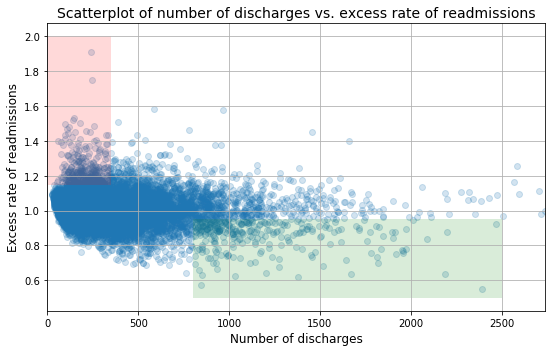

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

In [42]:
# Your turn
import seaborn as sns
from scipy import stats
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

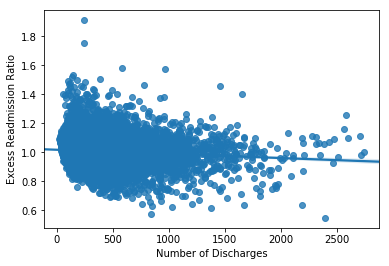

slope = -2.856505294381995e-05
intercept = 1.01794755795442


In [43]:
df = pd.DataFrame()
df['Number of Discharges'] = x
df['Excess Readmission Ratio'] = y

sns.regplot(y="Excess Readmission Ratio", x="Number of Discharges", data=df, fit_reg = True)
plt.show()

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

##### After examining the above plot, we can clearly observe that the two variables (Excess Readmission Ratio,Number of Discharges) are negatively correlated. After fitting a line across the scatter plot, we can clear validate the above points and the conclusions drawn 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

##### Null Hypothesis:  The two variables are not correlated i.e., p=0
##### Alternate Hypothesis: The two variables are correlated i.e., p>0 and p<0

In [44]:
import numpy as np
from scipy import stats

def pearsonr_ci(x,y,alpha=0.01):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [47]:
r, p, lo, hi = pearsonr_ci(x,y)

print(' p-value = {p} \n Pearson Correlation Coefficient = {r}'.format(p=p, r=r))


 p-value = 0.0 
 Pearson Correlation Coefficient = -1.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in arctanh
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


##### The low p-value (p-value = 0) indicates that the Null-Hypothesis is rejected.

##### Statistical Significance: This option specifies one or more values for the probability of a type-I error. A type-I error occurs when you reject the null hypothesis of equal correlations when in fact they are equal. Values of alpha must be between zero and one. Historically, the value of 0.05 has been used for alpha. This means that about one test in twenty will falsely reject the null hypothesis. You should pick a value for alpha that represents the risk of a type-I error you are willing to take in your experimental situation. You may enter a range of values such as 0.01 0.05 0.10 or 0.01 to 0.10 by 0.01.

##### Practical Significance: What we need is some estimate of how much variation in Pearson r we can expect just by random chance. That is, we need to construct a sampling distribution for r and determine its standard error. All variables are correlated to some extent; rarely will a correlation be exactly zero. What we need is to be able to draw a line, that tells us that above that line a correlation will be considered as a real correlation and below that line the correlation will be considered as probably due to chance alone.

##### In our case alpha value does not matter.

### Advantages of Scatter Plot

##### The following are a few advantages of a scatter diagram:

##### 1. It shows the relationship between two variables.
##### 2. It is the best method to show you a non-linear pattern.
##### 3. Plotting the diagram is relatively simple.

## Limitations Of Scatter Plot:

##### 1. Scatter diagrams are unable to give you the exact extent of correlation.
##### 2. Scatter diagram does not show you the quantitative measure of the relationship between the variable.
##### 3. This chart does not show you the relationship for more than two variables.

In [59]:
# Your turn
import seaborn as sns
from scipy import stats
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

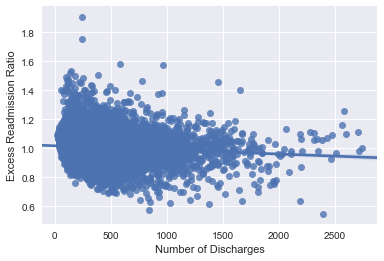

slope = -2.856505294381995e-05
intercept = 1.01794755795442


In [60]:
df = pd.DataFrame()
df['Number of Discharges'] = x
df['Excess Readmission Ratio'] = y

sns.regplot(y="Excess Readmission Ratio", x="Number of Discharges", data=df, fit_reg = True)
plt.show()

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x, y, 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b)

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

##### In this plot, we can clearly see that the regression line is negatively skewed and also the intercept can clearly be seen.